In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
#read the dataset
df = pd.read_csv('/content/hotel_bookings.csv.zip')
#First few rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# Shape of the dataset
print("Rows, Columns:", df.shape)

df.head()

Rows, Columns: (119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
#Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [7]:
# Counting missing values per column
df.isna().sum().sort_values(ascending=False)

,0
company,112593
agent,16340
country,488
children,4
arrival_date_month,0
arrival_date_week_number,0
hotel,0
is_canceled,0
stays_in_weekend_nights,0
arrival_date_day_of_month,0


In [8]:
# Filling missing children with 0
df['children'] = df['children'].fillna(0)

# Filling missing company and agent with 'Unknown'
df['company'] = df['company'].fillna('Unknown')
df['agent'] = df['agent'].fillna('Unknown')

# Drop rows with missing 'country'
df = df.dropna(subset=['country'])

# New feature: total number of nights
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# New feature: total number of guests
df['total_guests'] = df['adults'] + df['children'] + df['babies']

df[['stays_in_weekend_nights', 'stays_in_week_nights', 'total_stay', 'total_guests']].head()


,stays_in_weekend_nights,stays_in_week_nights,total_stay,total_guests
0,0,0,0,2.0
1,0,0,0,2.0
2,0,1,1,1.0
3,0,1,1,1.0
4,0,2,2,2.0


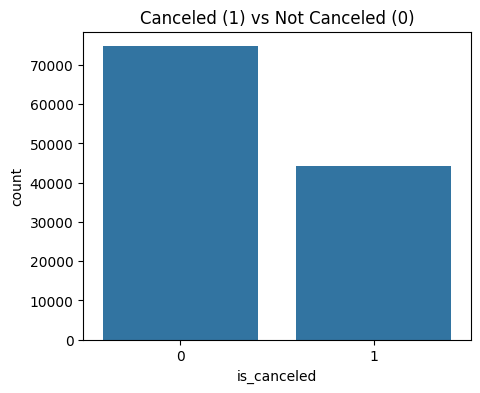

is_canceled
0    62.862694
1    37.137306
Name: proportion, dtype: float64


In [9]:
# Plotting cancellation counts
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='is_canceled')
plt.title("Canceled (1) vs Not Canceled (0)")
plt.show()

# Show percentages
print(df['is_canceled'].value_counts(normalize=True) * 100)


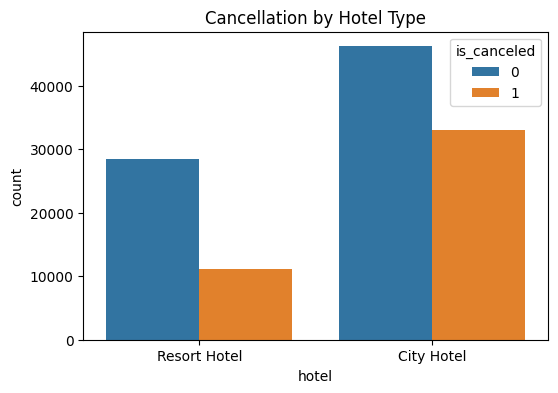

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='hotel', hue='is_canceled')
plt.title("Cancellation by Hotel Type")
plt.show()


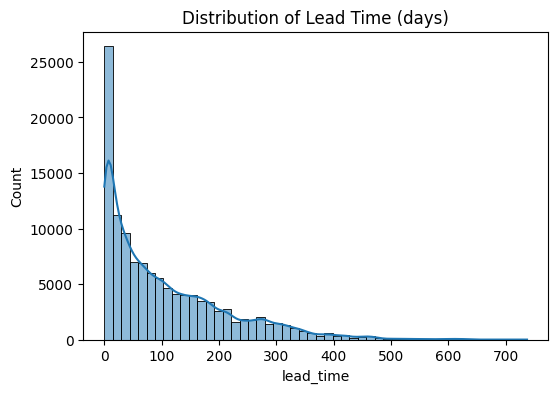

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(df['lead_time'], bins=50, kde=True)
plt.title("Distribution of Lead Time (days)")
plt.show()


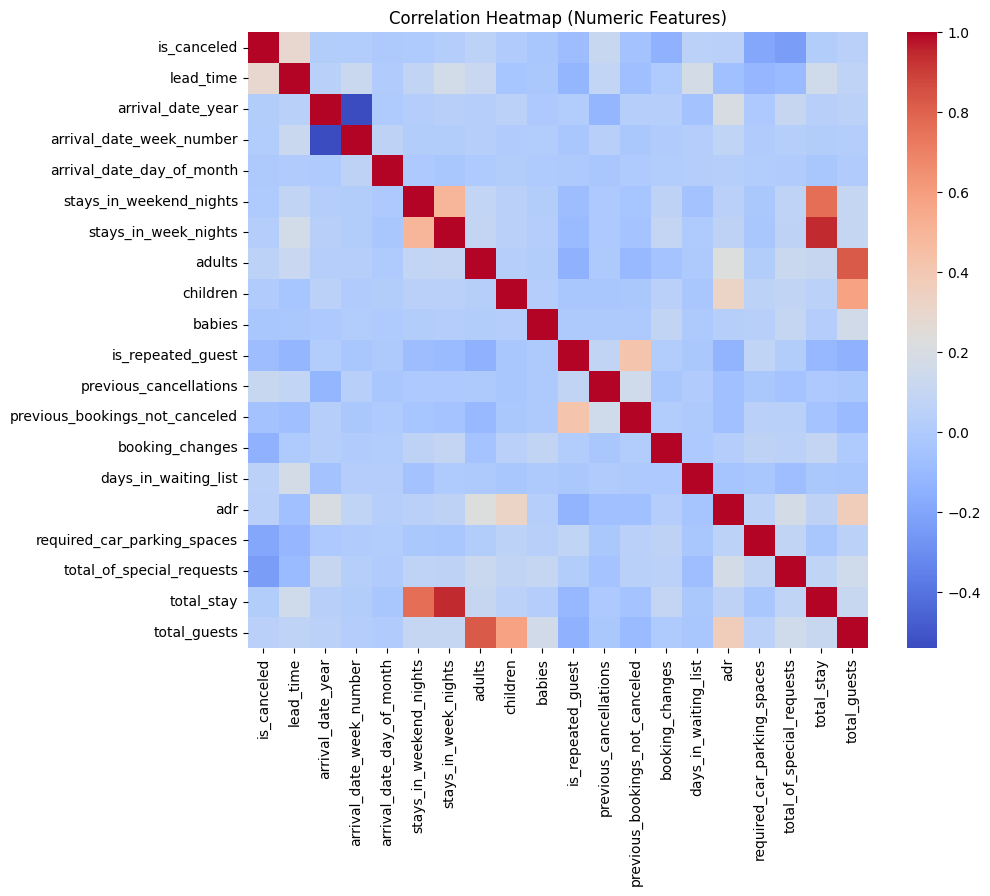

In [12]:
#We are going the see the which featue is important?
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [13]:
corr = df.corr(numeric_only=True)['is_canceled'].sort_values(ascending=False)
corr


,is_canceled
is_canceled,1.000000
lead_time,0.291940
previous_cancellations,0.109914
adults,0.058408
days_in_waiting_list,0.054008
adr,0.046133
total_guests,0.045046
stays_in_week_nights,0.024103
total_stay,0.016963
arrival_date_year,0.016339


In [19]:
feature_cols = [
    'lead_time',
    'previous_cancellations',
    'booking_changes',
    'required_car_parking_spaces',
    'total_of_special_requests',
    'is_repeated_guest',
    'adr',
    'deposit_type',
    'customer_type',
    'market_segment',
    'hotel'
]

In [20]:
df_model = df[feature_cols + ['is_canceled']].copy()

df_model.head()

,lead_time,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests,is_repeated_guest,adr,deposit_type,customer_type,market_segment,hotel,is_canceled
0,342,0,3,0,0,0,0.0,No Deposit,Transient,Direct,Resort Hotel,0
1,737,0,4,0,0,0,0.0,No Deposit,Transient,Direct,Resort Hotel,0
2,7,0,0,0,0,0,75.0,No Deposit,Transient,Direct,Resort Hotel,0
3,13,0,0,0,0,0,75.0,No Deposit,Transient,Corporate,Resort Hotel,0
4,14,0,0,0,1,0,98.0,No Deposit,Transient,Online TA,Resort Hotel,0


In [22]:
for col in feature_cols + ['is_canceled']:
    if col not in df.columns:
        print("⚠️ Missing column:", col)


In [23]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['deposit_type', 'customer_type', 'market_segment', 'hotel']

label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

In [24]:
X = df_model[feature_cols]          # features
y = df_model['is_canceled']         # target


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y   # keeps same cancel ratio in train & test
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (95121, 11)
Test shape: (23781, 11)


In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

Accuracy: 0.8376014465329464

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.89      0.87     14949
           1       0.80      0.75      0.77      8832

    accuracy                           0.84     23781
   macro avg       0.83      0.82      0.82     23781
weighted avg       0.84      0.84      0.84     23781



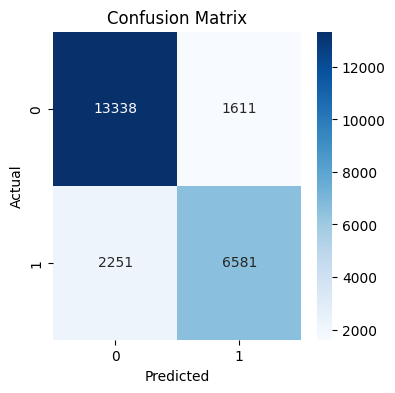

In [27]:
#Evaluating the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = rf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed metrics
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


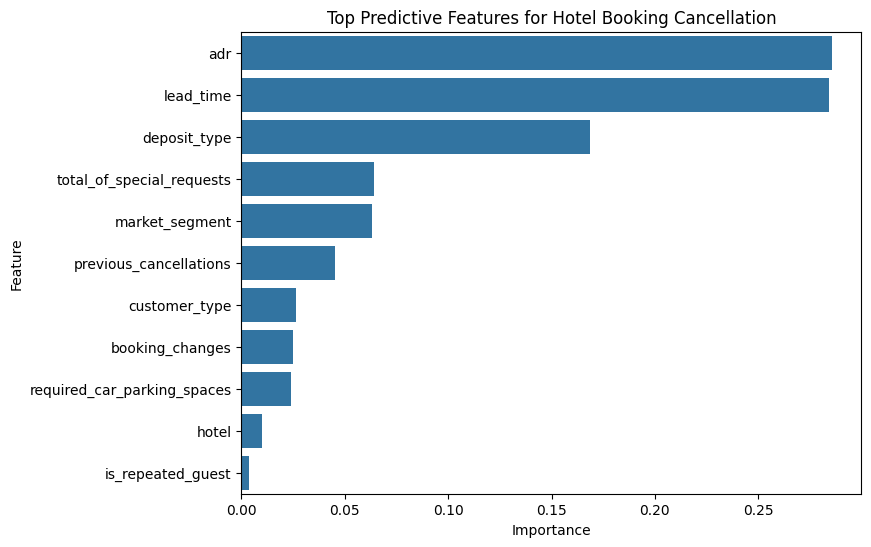

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=feat_imp, x='Importance', y='Feature')
plt.title("Top Predictive Features for Hotel Booking Cancellation")
plt.show()


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Build pipeline (scaling + model)
log_model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.7942895588915521
              precision    recall  f1-score   support

           0       0.77      0.95      0.85     14949
           1       0.87      0.53      0.66      8832

    accuracy                           0.79     23781
   macro avg       0.82      0.74      0.75     23781
weighted avg       0.81      0.79      0.78     23781



In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.8175434170135822
              precision    recall  f1-score   support

           0       0.80      0.94      0.87     14949
           1       0.85      0.61      0.71      8832

    accuracy                           0.82     23781
   macro avg       0.83      0.78      0.79     23781
weighted avg       0.82      0.82      0.81     23781



In [31]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8275093562087381
              precision    recall  f1-score   support

           0       0.82      0.93      0.87     14949
           1       0.85      0.65      0.74      8832

    accuracy                           0.83     23781
   macro avg       0.83      0.79      0.80     23781
weighted avg       0.83      0.83      0.82     23781



In [ ]:
#Need to improve the model performance and need to explore more

In [32]:
df_encoded = pd.get_dummies(df_model, columns=['deposit_type', 'customer_type', 'market_segment', 'hotel'], drop_first=True)
X = df_encoded.drop('is_canceled', axis=1)
y = df_encoded['is_canceled']


In [ ]:
#Hyperparameter Tuning (Grid Search / Random Search)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [200, 400, 600],
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 4, 6]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),
                       param_grid=param_grid,
                       cv=3, scoring='accuracy', n_jobs=-1)

rf_grid.fit(X_train, y_train)

print("Best Parameters:", rf_grid.best_params_)
print("Best Accuracy:", rf_grid.best_score_)

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(mutual_info_classif, k=15)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Top features:", selected_features)
